# election prediction

In [1]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
tf.compat.v1.disable_eager_execution()


RANDOMSEED = 40

input_data=pd.read_csv("C:/Users/97254/Downloads/county_factsNew.csv",encoding='latin-1')
input_data=input_data.iloc[50:180, :].sample(frac=1) # all rows, all the features and no labels

input_data.head()

,fips,area_name,state_abbreviation,AGE135214,AGE295214,AGE775214,SEX255214,RHI225214,RHI325214,RHI425214,...,POP815213,EDU635213,EDU685213,VET605213,LFE305213,state_abbreviation.1,party,candidate,votes,fraction_votes
165,5099.0,Nevada County,AR,6.4,22.7,19.4,50.6,30.5,0.5,0.4,...,2.7,82.1,12.8,762.0,25.1,AL,Republican,Donald Trump,1720,0.538
153,5075.0,Lawrence County,AR,5.6,22.6,19.3,50.5,1.0,0.5,0.2,...,1.4,77.4,10.4,1443.0,25.1,AL,Republican,Ted Cruz,1011,0.255
178,5125.0,Saline County,AR,6.0,23.8,17.1,51.0,6.6,0.6,1.1,...,4.3,89.2,23.4,10509.0,25.6,AL,Republican,Ted Cruz,914,0.200
62,1121.0,Talladega County,AL,5.5,22.3,16.1,51.4,32.5,0.4,0.4,...,2.8,78.9,13.0,6691.0,23.9,AL,Democrat,Bernie Sanders,213,0.071
113,4025.0,Yavapai County,AZ,4.1,17.4,28.1,51.1,0.9,2.1,1.0,...,10.4,90.2,24.2,27950.0,22.2,AL,Democrat,Hillary Clinton,4381,0.728


# labelencoder

In [2]:
labelencoder=LabelEncoder()
for col in input_data.columns:
    input_data[col] = labelencoder.fit_transform(input_data[col].astype(str))

target = input_data.iloc[80:150, 22].sample(frac=1)# all ows, label only
max1=[]


# slice data

In [3]:
def load_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)

# model 1

Instructions for updating:
Use the `axis` argument instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step, train accuracy, test accuracy
1, 73.56%, 69.77%
2, 72.41%, 69.77%
3, 74.71%, 72.09%
4, 78.16%, 69.77%
5, 77.01%, 74.42%
6, 72.41%, 67.44%
7, 79.31%, 74.42%
8, 80.46%, 69.77%
9, 83.91%, 72.09%
10, 78.16%, 67.44%
11, 87.36%, 72.09%
12, 79.31%, 67.44%
13, 80.46%, 69.77%
14, 82.76%, 67.44%
15, 85.06%, 69.77%
16, 85.06%, 72.09%
17, 86.21%, 72.09%
18, 83.91%, 74.42%
19, 83.91%, 69.77%
20, 85.06%, 72.09%
21, 85.06%, 72.09%
22, 86.21%, 69.77%
23, 85.06%, 72.09%
24, 88.51%, 69.77%
25, 88.51%, 72.09%
26, 90.80%, 67.44%
27, 80.46%, 69.77%
28, 89.66%, 69.77%
29, 89.66%, 72.09%
30, 89.66%, 69.77%


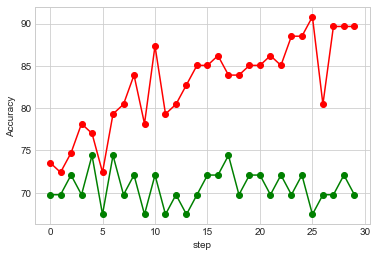

In [4]:
def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 30
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))

        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, train_acc, '-ok', color='red');

    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, test_acc, '-ok', color='green');
    plt.xlabel("step")
    plt.ylabel("Accuracy");
    max1.append(max(test_acc))

def main():
    run(128,0.1,0.01)


if __name__ == '__main__':
    main()

red line=train accuracy
green line=test accuracy


# model 2-smoller  step in gradient direction

Step, train accuracy, test accuracy
1, 64.37%, 69.77%
2, 71.26%, 69.77%
3, 72.41%, 74.42%
4, 73.56%, 72.09%
5, 74.71%, 72.09%
6, 78.16%, 72.09%
7, 78.16%, 74.42%
8, 80.46%, 74.42%
9, 83.91%, 74.42%
10, 83.91%, 74.42%
11, 83.91%, 74.42%
12, 85.06%, 74.42%
13, 86.21%, 74.42%
14, 86.21%, 74.42%
15, 86.21%, 74.42%
16, 86.21%, 74.42%
17, 86.21%, 74.42%
18, 86.21%, 74.42%
19, 87.36%, 74.42%
20, 87.36%, 74.42%
21, 88.51%, 74.42%
22, 88.51%, 74.42%
23, 88.51%, 74.42%
24, 88.51%, 74.42%
25, 89.66%, 74.42%
26, 89.66%, 74.42%
27, 89.66%, 74.42%
28, 89.66%, 74.42%
29, 90.80%, 74.42%
30, 90.80%, 74.42%


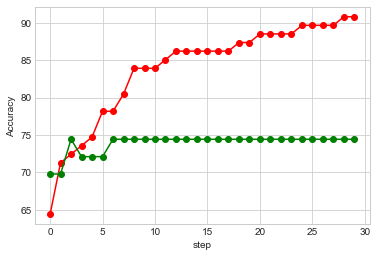

In [5]:
def load_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)




def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_iris_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 30
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))

        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, train_acc, '-ok', color='red');

    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, test_acc, '-ok', color='green');
    plt.xlabel("step")
    plt.ylabel("Accuracy");
    max1.append(max(test_acc))

def main():
    run(128,0.1,0.001)


if __name__ == '__main__':
    main()

red line=train accuracy
green line=test accuracy


#model 3-overfitting

Step, train accuracy, test accuracy
1, 67.82%, 60.47%
2, 67.82%, 60.47%
3, 68.97%, 60.47%
4, 73.56%, 60.47%
5, 79.31%, 60.47%
6, 79.31%, 62.79%
7, 82.76%, 62.79%
8, 85.06%, 62.79%
9, 85.06%, 62.79%
10, 86.21%, 62.79%
11, 87.36%, 62.79%
12, 87.36%, 62.79%
13, 87.36%, 62.79%
14, 89.66%, 62.79%
15, 89.66%, 62.79%
16, 90.80%, 60.47%
17, 90.80%, 60.47%
18, 90.80%, 60.47%
19, 90.80%, 62.79%
20, 91.95%, 62.79%
21, 94.25%, 62.79%
22, 94.25%, 62.79%
23, 95.40%, 62.79%
24, 95.40%, 62.79%
25, 95.40%, 62.79%
26, 95.40%, 62.79%
27, 95.40%, 65.12%
28, 95.40%, 65.12%
29, 95.40%, 65.12%
30, 95.40%, 65.12%


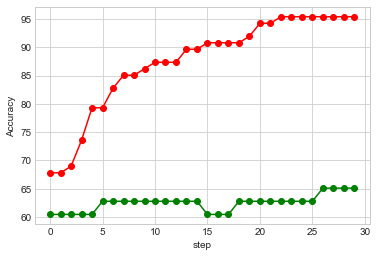

In [6]:
def load_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)




def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 30
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))
        
        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, train_acc, '-ok', color='red');

    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, test_acc, '-ok', color='green');
    plt.xlabel("step")
    plt.ylabel("Accuracy");
    max1.append(max(test_acc))

def main():
    run(140,0.1,0.001)


if __name__ == '__main__':
    main()

red line=train accuracy
green line=test accuracy


# model 4-under fitting

Step, train accuracy, test accuracy
1, 70.11%, 58.14%
2, 77.01%, 62.79%
3, 79.31%, 62.79%
4, 79.31%, 62.79%
5, 77.01%, 62.79%
6, 77.01%, 62.79%
7, 78.16%, 62.79%
8, 79.31%, 62.79%
9, 79.31%, 62.79%
10, 81.61%, 62.79%
11, 81.61%, 62.79%
12, 83.91%, 65.12%
13, 85.06%, 65.12%
14, 86.21%, 62.79%
15, 85.06%, 62.79%
16, 85.06%, 62.79%
17, 86.21%, 65.12%
18, 86.21%, 67.44%
19, 88.51%, 67.44%
20, 89.66%, 67.44%
21, 89.66%, 67.44%
22, 89.66%, 67.44%
23, 89.66%, 67.44%
24, 90.80%, 67.44%
25, 90.80%, 67.44%
26, 90.80%, 67.44%
27, 91.95%, 67.44%
28, 91.95%, 69.77%
29, 91.95%, 72.09%
30, 90.80%, 67.44%


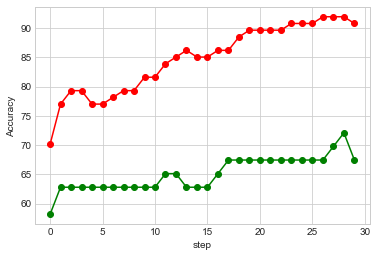

In [8]:
def load_iris_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)




def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_iris_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 30
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))
        
        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, train_acc, '-ok', color='red');

    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, test_acc, '-ok', color='green');
    plt.xlabel("step")
    plt.ylabel("Accuracy");
    
    max1.append(max(test_acc))

def main():
    run(80,0.1,0.001)


if __name__ == '__main__':
    main()

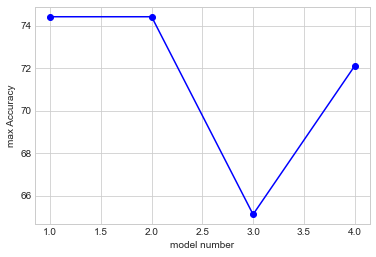

In [9]:

import matplotlib.pyplot as plt
xx=[1,2,3,4]
plt.style.use('seaborn-whitegrid')
    
plt.plot(xx, max1, '-ok', color='blue');
plt.xlabel("model number")
plt.ylabel("max Accuracy");